# method

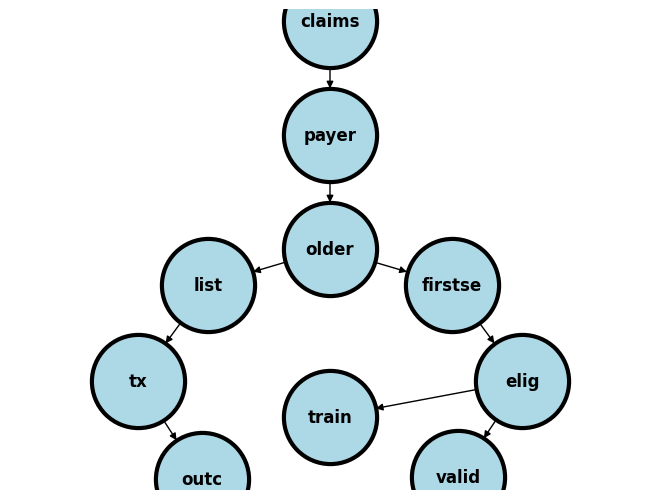

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("claims", pos = (0, 950))
G.add_node("payer", pos = (0, 475))
G.add_node("older", pos = (0,0))
G.add_node("firstse", pos = (1900, -150) )
G.add_node("list", pos = (-1900, -150) )
G.add_node("elig", pos = (3000, -550) )
G.add_node("tx", pos = (-3000, -550) )
G.add_node("valid",  pos = (2000, -950) )
G.add_node("outc",  pos = (-2000, -960) )
G.add_node("train",  pos = (0,-700) )
G.add_edges_from([("claims","payer")])
G.add_edges_from([("payer","older")])
G.add_edges_from([("older", "list"), ("older", "firstse")])
G.add_edges_from([("list", "tx"), ("firstse", "elig") ])
G.add_edges_from([ ("tx","outc"), ("elig", "valid"), ("elig", "train")])

nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

* Claims (Part D: N=561,304)
     * Without Payer, Part A, B, or MPO: N=383,833
* Payer (Part A, B, or MPO: N=177,471)
     * Age < 65y or no hemodialysis: N=104,995
* Older (Hemodialysis: N=72,476)
     * First_SE < 01/01/2013: N=23,879
* First_SE (01/01/2013-12/31/2014: N=48,597)
     * Missing data (Race, BMI, modality, death, coverage, <91d from FIRST_SE: N=9,278)
* Eligible (For inclusion into study: N=39,319)
     * Training (N==15,750)
     * Validation (N=23,569)



<Details>
   <Summary></Summary>

`dot` vs. `python`

```bash
digraph G {
    
    label = "\n\n Figure 1. Odds of eligibility for cisplatin in black patients with bladder cancer when race-free eGFR is used";
    rankdir = "TB";

    // Graph layout parameters
    graph [splines=polyline, nodesep=1];
    edge [dir=none, color="black"];
    node [shape=box, style="rounded, filled"];

    // Define nodes
    Bladder_Cancer [label="Bladder Cancer", pos="0,2.5!"];
    eligibility [shape=point, width=0, height=0, pos="0,2!"];
    eGFR_greater_than_60 [label="eGFR>60ml/min", fillcolor="honeydew", pos="0,0!"]
    invis1 [shape=point, width=0, height=0, pos="-2.5,0!"];
    invis2 [shape=point, width=0, height=0, pos="2.5,0!"];
    invis3 [shape=point, width=0, height=0, pos="-4,-2.5!"];
    invis4 [shape=point, width=0, height=0, pos="-1,-2.5!"];
    CKD_EPI_2021 [label="CKD-EPI 2021", fillcolor="lightblue", pos="-2.5,-2.5!"];
    CKD_EPI_2009 [label="CKD-EPI 2009", fillcolor="lightpink", pos="2.5,-2.5!"];
    invis5 [shape=point, width=0, height=0, pos="1,-2.5!"];
    invis6 [shape=point, width=0, height=0, pos="4,-2.5!"];
    Cisplatin_Positive1 [label="Cisplatin+", fillcolor="lightyellow", pos="-4,-5!"];
    Cisplatin_Negative1 [label="Cisplatin-", fillcolor="lightcoral", pos="-1,-5!"];
    Cisplatin_Positive2 [label="Cisplatin+", fillcolor="lightyellow", pos="1,-5!"];
    Cisplatin_Negative2 [label="Cisplatin-", fillcolor="lightcoral", pos="4,-5!"];

    // Define edges
    Bladder_Cancer -> eligibility;
    eligibility -> eGFR_greater_than_60;
    eGFR_greater_than_60 -> invis1;
    eGFR_greater_than_60 -> invis2;
    invis1 -> CKD_EPI_2021;
    CKD_EPI_2021 -> invis3;
    CKD_EPI_2021 -> invis4;
    invis2 -> CKD_EPI_2009;
    CKD_EPI_2009 -> invis5;
    CKD_EPI_2009 -> invis6;
    invis3 -> Cisplatin_Positive1;
    invis4 -> Cisplatin_Negative1;
    invis5 -> Cisplatin_Positive2;
    invis6 -> Cisplatin_Negative2;

    // Same level definition
    {
        rank=same;
        invis2;
        invis1;
        eGFR_greater_than_60; // Centered random node
    }
}
```

```bash
neato -Tpng fig1.dot -o fig1_cisplatin.png
```

![](https://github.com/jhutrc/beta/blob/main/act_0/act_0_2/act_0_2_1/fig1_cisplatin.png?raw=true)

</Details>